In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import random

# Define the base dataset directory
base_dir = "/kaggle/input/cell-images-for-detecting-malaria/cell_images"

# Paths for each class
infected_dir = os.path.join(base_dir, "Parasitized")
uninfected_dir = os.path.join(base_dir, "Uninfected")

# Count images in each class
print("Number of Parasitized images:", len(os.listdir(infected_dir)))
print("Number of Uninfected images:", len(os.listdir(uninfected_dir)))


Number of Parasitized images: 13780
Number of Uninfected images: 13780


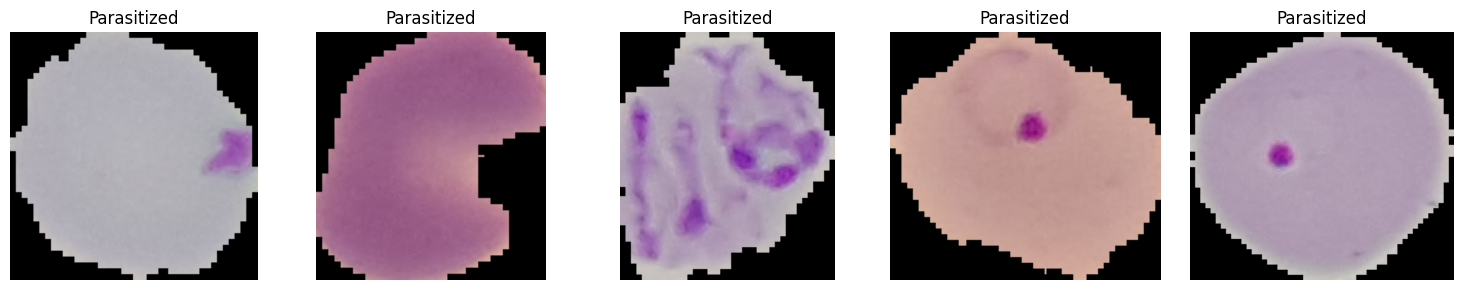

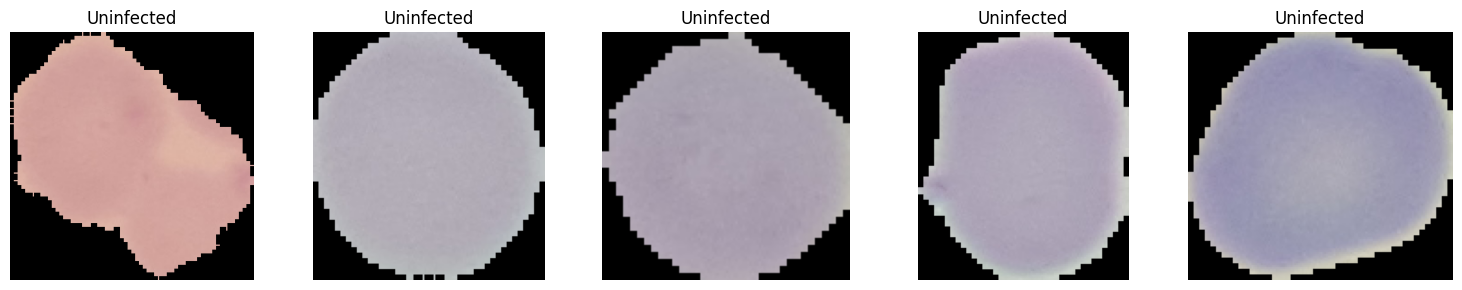

In [ ]:
def show_random_images(folder, title, n=5):
    files = os.listdir(folder)
    samples = random.sample(files, n)

    plt.figure(figsize=(15, 3))
    for i, file in enumerate(samples):
        img = cv2.imread(os.path.join(folder, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for display
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)
    plt.tight_layout()
    plt.show()

# Show 5 random images from each class
show_random_images(infected_dir, "Parasitized")
show_random_images(uninfected_dir, "Uninfected")


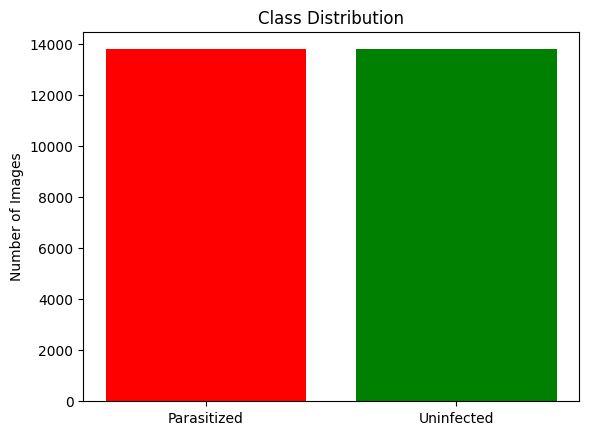

In [ ]:
infected_count = len(os.listdir(infected_dir))
uninfected_count = len(os.listdir(uninfected_dir))

# Bar chart to show class balance
plt.bar(["Parasitized", "Uninfected"], [infected_count, uninfected_count], color=["red", "green"])
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()


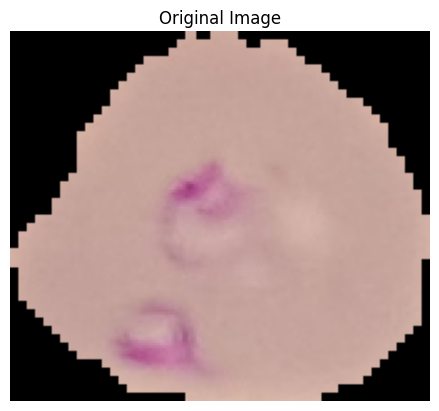

In [ ]:
# Load a random image from the Parasitized class and convert it to RGB for display
sample_path = os.path.join(infected_dir, random.choice(os.listdir(infected_dir)))
img = cv2.imread(sample_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()


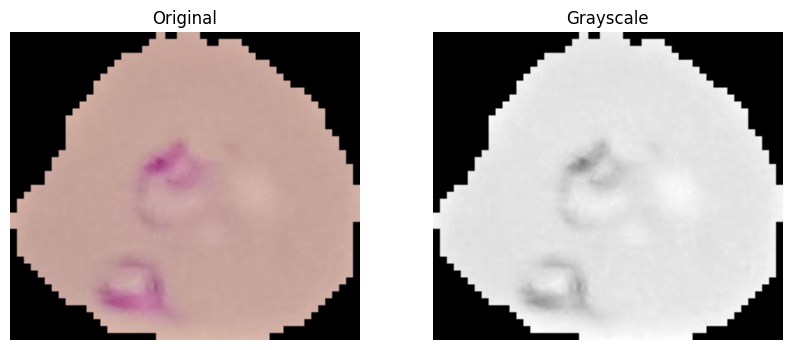

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display original vs grayscale
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.show()


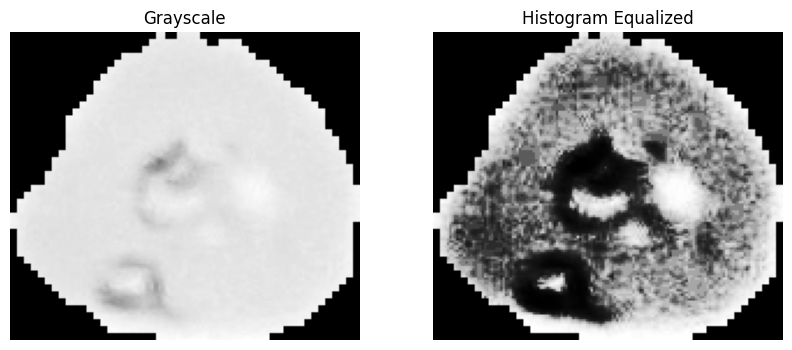

In [ ]:
# Apply histogram equalization to the grayscale image to enhance contrast
equalized = cv2.equalizeHist(gray)

# Display grayscale vs histogram equalized
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized")
plt.axis('off')
plt.show()


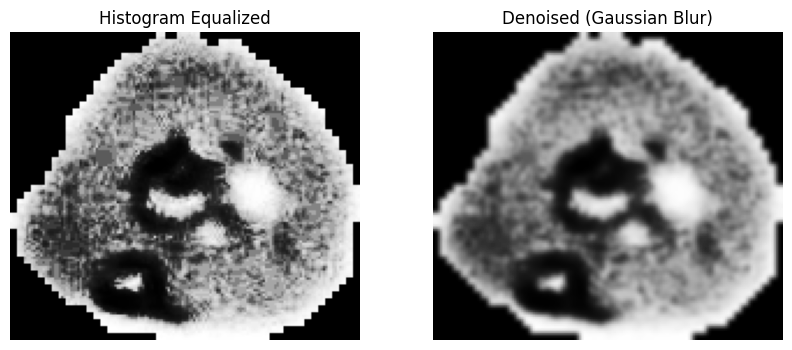

In [ ]:
# Apply Gaussian Blur to the equalized image to remove noise
denoised = cv2.GaussianBlur(equalized, (5, 5), 0)

# Display equalized vs denoised
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised (Gaussian Blur)")
plt.axis('off')
plt.show()


In [ ]:
# def preprocess_image(image_path):
#     img = cv2.imread(image_path)
#     if img is None:
#         return None  # skip if image is unreadable
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     equalized = cv2.equalizeHist(gray)
#     denoised = cv2.GaussianBlur(equalized, (5, 5), 0)
#     return denoised
# # Process Parasitized images
# for img_file in tqdm(os.listdir(infected_dir), desc="Processing Parasitized"):
#     img_path = os.path.join(infected_dir, img_file)
#     processed_img = preprocess_image(img_path)
#     if processed_img is not None:
#         data.append(processed_img)
#         labels.append(1)

# # Process Uninfected images
# for img_file in tqdm(os.listdir(uninfected_dir), desc="Processing Uninfected"):
#     img_path = os.path.join(uninfected_dir, img_file)
#     processed_img = preprocess_image(img_path)
#     if processed_img is not None:
#         data.append(processed_img)
#         labels.append(0)


Processing Uninfected: 100%|██████████| 13780/13780 [01:56<00:00, 118.54it/s]


In [ ]:
def preprocess_image(image_path, target_size=(64, 64)):
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.resize(img, target_size)  # Resize image to (64x64)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(gray)
    denoised = cv2.GaussianBlur(equalized, (5, 5), 0)
    return denoised
data = []
labels = []

# Reprocess all images with resizing
for img_file in tqdm(os.listdir(infected_dir), desc="Processing Parasitized"):
    img_path = os.path.join(infected_dir, img_file)
    processed_img = preprocess_image(img_path)
    if processed_img is not None:
        data.append(processed_img)
        labels.append(1)

for img_file in tqdm(os.listdir(uninfected_dir), desc="Processing Uninfected"):
    img_path = os.path.join(uninfected_dir, img_file)
    processed_img = preprocess_image(img_path)
    if processed_img is not None:
        data.append(processed_img)
        labels.append(0)


Processing Uninfected: 100%|██████████| 13780/13780 [00:26<00:00, 515.93it/s]


In [ ]:
data = np.array(data)
labels = np.array(labels)


In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Split train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    data, labels, test_size=0.30, stratify=labels, random_state=42)

# Step 2: Split temp into val (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Print the shapes to verify
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (19290, 64, 64)
Validation shape: (4134, 64, 64)
Test shape: (4134, 64, 64)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


2025-05-23 18:18:17.891844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748024298.138139      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748024298.206056      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748024312.219288      35 gpu_device.cc:2022] Created device /job:localhost/repl

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,624,705 (6.20 MB)

 Trainable params: 1,624,705 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)


Epoch 1/10


I0000 00:00:1748024333.824490     117 service.cc:148] XLA service 0x7e50040443d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748024333.825172     117 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748024333.825190     117 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748024334.124622     117 cuda_dnn.cc:529] Loaded cuDNN version 90300


 36/603 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4943 - loss: 41.2792

I0000 00:00:1748024336.960756     117 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


603/603 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6558 - loss: 5.5584 - val_accuracy: 0.8638 - val_loss: 0.3372
Epoch 2/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8730 - loss: 0.3157 - val_accuracy: 0.8861 - val_loss: 0.2835
Epoch 3/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9035 - loss: 0.2477 - val_accuracy: 0.8960 - val_loss: 0.2553
Epoch 4/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9090 - loss: 0.2285 - val_accuracy: 0.9032 - val_loss: 0.2455
Epoch 5/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9251 - loss: 0.1989 - val_accuracy: 0.9119 - val_loss: 0.2355
Epoch 6/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9334 - loss: 0.1753 - val_accuracy: 0.9008 - val_loss: 0.2559
Epoch 7/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9413 - loss: 0.1541 - val_accuracy: 0.9040 - val_loss: 0.2797
Epoch 8/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9475 - loss: 0.1435 - val_accuracy: 0.9124 - val

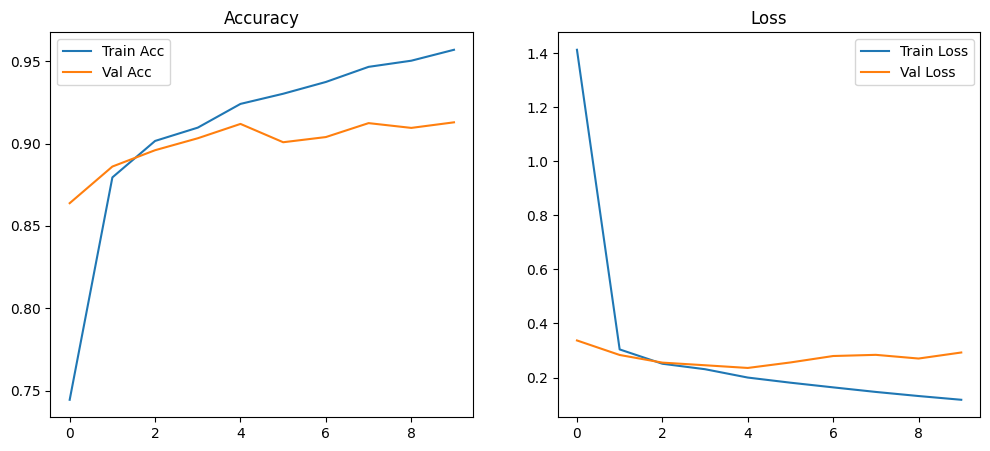

In [ ]:
# Plot training vs validation accuracy & loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [ ]:
# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()


130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


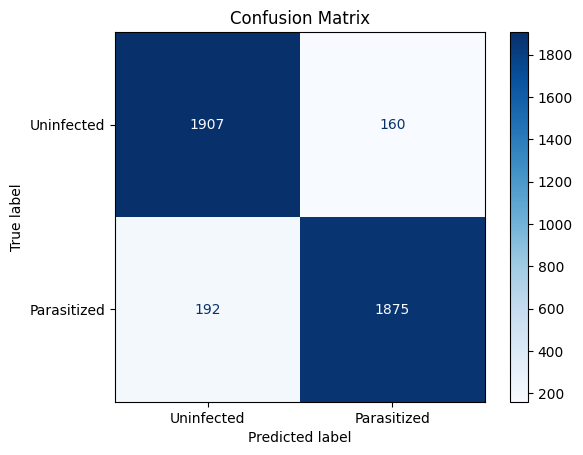

              precision    recall  f1-score   support

  Uninfected       0.91      0.92      0.92      2067
 Parasitized       0.92      0.91      0.91      2067

    accuracy                           0.91      4134
   macro avg       0.91      0.91      0.91      4134
weighted avg       0.91      0.91      0.91      4134



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Uninfected", "Parasitized"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Precision, Recall, F1, Accuracy
print(classification_report(y_test, y_pred, target_names=["Uninfected", "Parasitized"]))


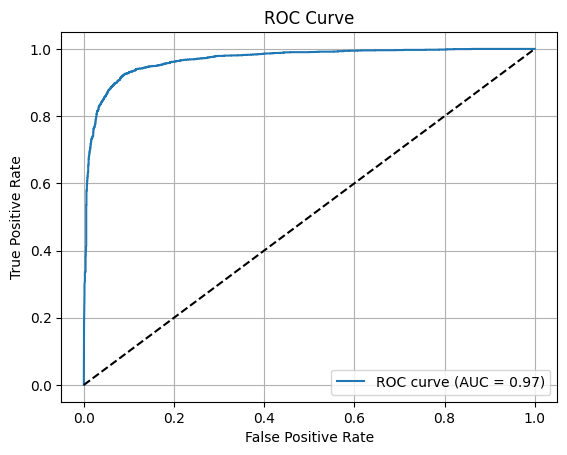

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


2025-05-28 16:36:25.757354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748450185.986378      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748450186.056088      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


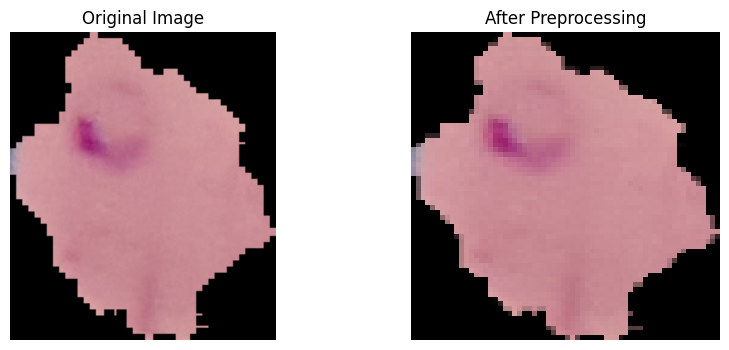

Processing Uninfected: 100%|██████████| 13780/13780 [01:38<00:00, 139.29it/s]
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748450410.580212      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748450410.580915      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,274,305 (4.86 MB)

 Trainable params: 1,273,857 (4.86 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1748450416.217873     102 service.cc:148] XLA service 0x7eada4011850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748450416.218955     102 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748450416.218976     102 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748450416.688123     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/603 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.5223 - loss: 1.8949

I0000 00:00:1748450420.312464     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


603/603 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7228 - loss: 0.7751 - val_accuracy: 0.8931 - val_loss: 0.2496 - learning_rate: 0.0010
Epoch 2/30
603/603 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.8984 - loss: 0.2914 - val_accuracy: 0.9560 - val_loss: 0.1387 - learning_rate: 0.0010
Epoch 3/30
603/603 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.9164 - loss: 0.2471 - val_accuracy: 0.9366 - val_loss: 0.2519 - learning_rate: 0.0010
Epoch 4/30
603/603 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.9196 - loss: 0.2418 - val_accuracy: 0.9598 - val_loss: 0.1403 - learning_rate: 0.0010
Epoch 5/30
603/603 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.9200 - loss: 0.2357 - val_accuracy: 0.9589 - val_loss: 0.1297 - learning_rate: 0.0010
Epoch 6/30
603/603 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.9235 - loss: 0.2326 - val_accuracy: 0.9470 - val_loss: 0.1700 - learning_rate: 0.0010
Epoch 7/30
603/603 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.9283 - loss: 0.2198

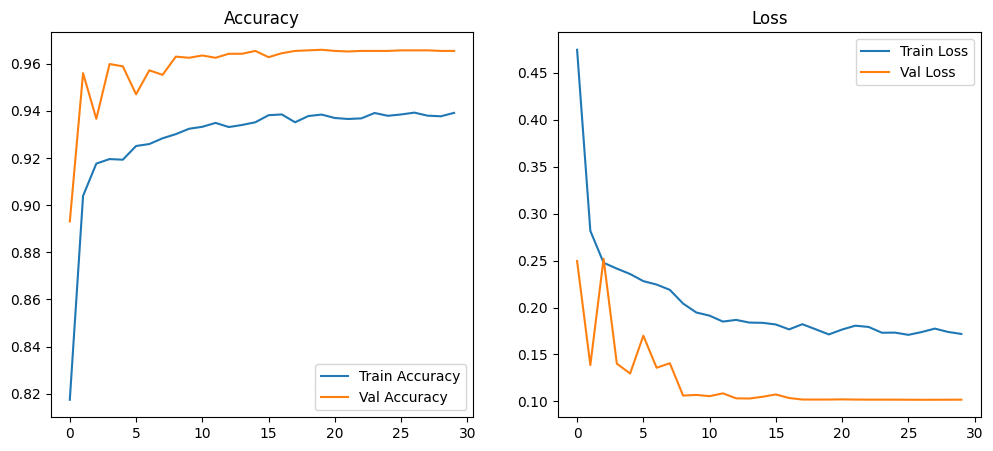

130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


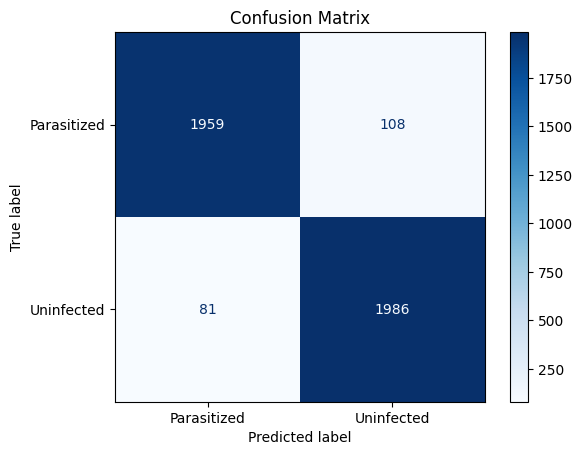

              precision    recall  f1-score   support

 Parasitized       0.96      0.95      0.95      2067
  Uninfected       0.95      0.96      0.95      2067

    accuracy                           0.95      4134
   macro avg       0.95      0.95      0.95      4134
weighted avg       0.95      0.95      0.95      4134



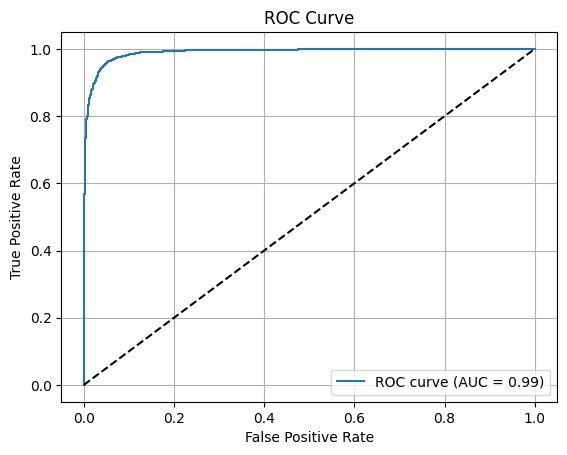

In [ ]:
# 1. Import Libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2. Preprocessing Function

def preprocess_image(image_path, target_size=(64, 64)):
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Visual Comparison Before/After
sample_path = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/" + \
              os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized")[0]

original_img = cv2.imread(sample_path)
preprocessed_img = preprocess_image(sample_path)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(preprocessed_img)
plt.title("After Preprocessing")
plt.axis('off')
plt.show()

# 3. Load Dataset
def load_dataset(base_dir):
    data = []
    labels = []
    infected_dir = os.path.join(base_dir, "Parasitized")
    uninfected_dir = os.path.join(base_dir, "Uninfected")

    for label, folder in enumerate([infected_dir, uninfected_dir]):
        for img_file in tqdm(os.listdir(folder), desc=f"Processing {'Parasitized' if label==0 else 'Uninfected'}"):
            img_path = os.path.join(folder, img_file)
            processed_img = preprocess_image(img_path)
            if processed_img is not None:
                data.append(processed_img)
                labels.append(label)

    return np.array(data), np.array(labels)

# =========================
# 4. Load Data
# =========================
base_path = "/kaggle/input/cell-images-for-detecting-malaria/cell_images"
X, y = load_dataset(base_path)
X = X / 255.0  # Normalize

# =========================
# 5. Data Split (70/15/15)
# =========================
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# =========================
# 6. Data Augmentation
# =========================
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# =========================
# 7. Build CNN Model
# =========================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# =========================
# 8. Callbacks
# =========================
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3)
]

# =========================
# 9. Class Weights
# =========================
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# =========================
# 10. Train the Model
# =========================
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=30,
    callbacks=callbacks,
    class_weight=class_weight_dict
)

# =========================
# 11. Evaluate the Model
# =========================
# Accuracy/Loss Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# =========================
# 12. Confusion Matrix + Report
# =========================
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Parasitized", "Uninfected"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=["Parasitized", "Uninfected"]))

# =========================
# 13. ROC Curve
# =========================
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
# 1. Import Libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2025-05-28 18:51:00.772625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748458261.328250      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748458261.468136      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


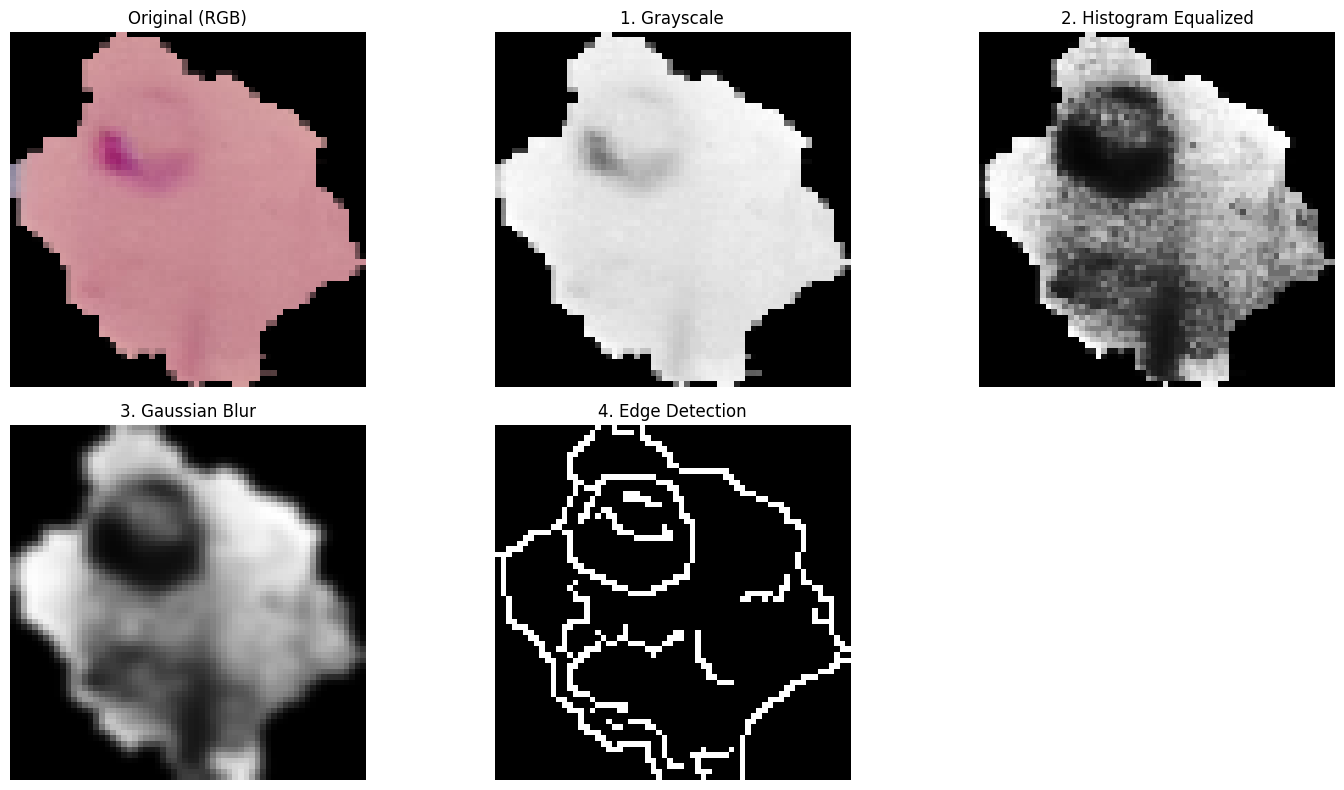

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Sample image path
sample_path = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/" + \
              os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized")[0]

# Step 0: Load image
original = cv2.imread(sample_path)
resized = cv2.resize(original, (64, 64))

# Step 1: Grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# Step 2: Histogram Equalization
equalized = cv2.equalizeHist(gray)

# Step 3: Gaussian Blur (Denoising)
blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

# Step 4: Edge Detection
edges = cv2.Canny(blurred, 100, 200)

# =======================
# 🔍 Visualization: Before vs After
# =======================
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title("Original (RGB)")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("1. Grayscale")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(equalized, cmap='gray')
plt.title("2. Histogram Equalized")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(blurred, cmap='gray')
plt.title("3. Gaussian Blur")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(edges, cmap='gray')
plt.title("4. Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# =========================
# 1. Import Libraries
# =========================
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# =========================
# 2. Preprocessing Function
# =========================
def preprocess_image(image_path, target_size=(64, 64)):
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# =========================
# Visual Comparison Before/After
# =========================
sample_path = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/" + \
              os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized")[0]

original_img = cv2.imread(sample_path)
preprocessed_img = preprocess_image(sample_path)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(preprocessed_img)
plt.title("After Preprocessing")
plt.axis('off')
plt.show()

# =========================
# 3. Load Dataset
# =========================
def load_dataset(base_dir):
    data = []
    labels = []
    infected_dir = os.path.join(base_dir, "Parasitized")
    uninfected_dir = os.path.join(base_dir, "Uninfected")

    for label, folder in enumerate([infected_dir, uninfected_dir]):
        for img_file in tqdm(os.listdir(folder), desc=f"Processing {'Parasitized' if label==0 else 'Uninfected'}"):
            img_path = os.path.join(folder, img_file)
            processed_img = preprocess_image(img_path)
            if processed_img is not None:
                data.append(processed_img)
                labels.append(label)

    return np.array(data), np.array(labels)

# =========================
# 4. Load Data
# =========================
base_path = "/kaggle/input/cell-images-for-detecting-malaria/cell_images"
X, y = load_dataset(base_path)
X = X / 255.0  # Normalize

# =========================
# 5. Data Split (70/15/15)
# =========================
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# =========================
# 6. Data Augmentation
# =========================
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# =========================
# 7. Build CNN Model
# =========================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# =========================
# 8. Callbacks
# =========================
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3)
]

# =========================
# 9. Class Weights
# =========================
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# =========================
# 10. Train the Model
# =========================
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=30,
    callbacks=callbacks,
    class_weight=class_weight_dict
)

# =========================
# 11. Evaluate the Model
# =========================
# Accuracy/Loss Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# =========================
# 12. Confusion Matrix + Report
# =========================
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Parasitized", "Uninfected"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=["Parasitized", "Uninfected"]))

# =========================
# 13. ROC Curve
# =========================
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


2025-05-28 21:20:59.650414: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748467259.998721      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748467260.070677      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Number of Parasitized images: 13780
Number of Uninfected images: 13780


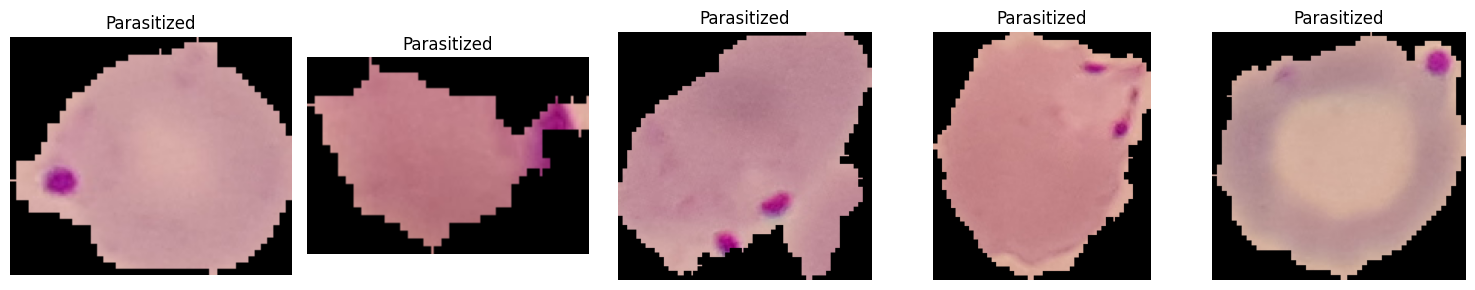

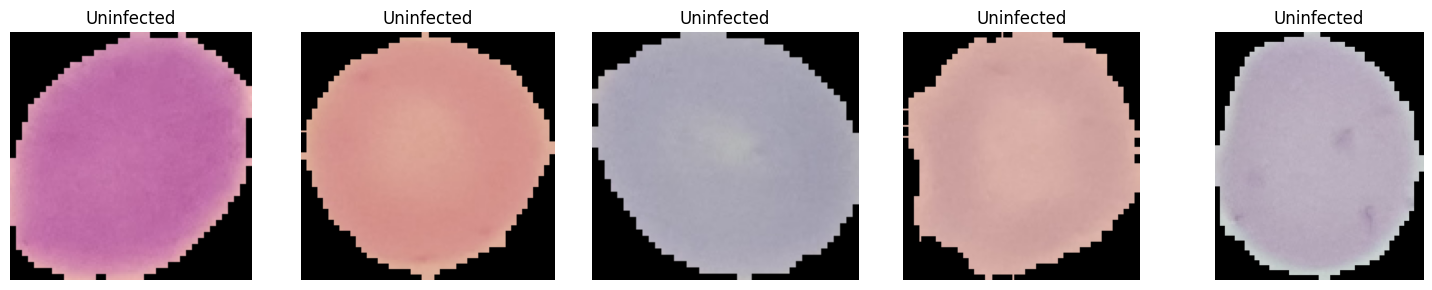

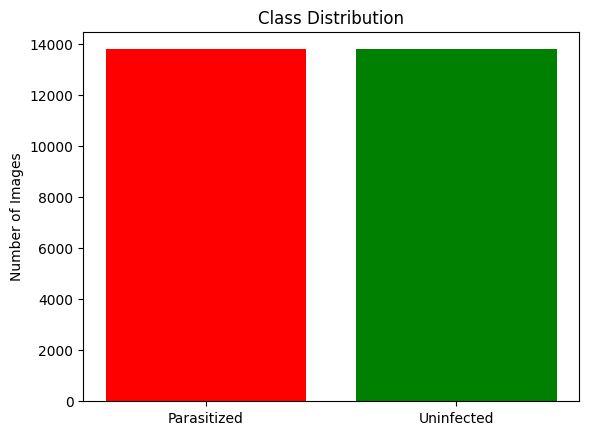

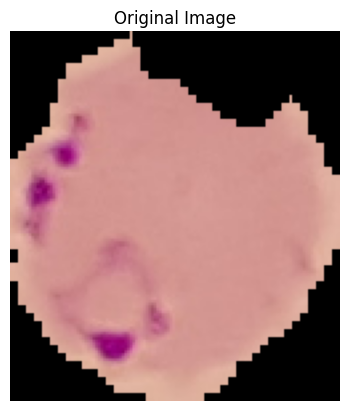

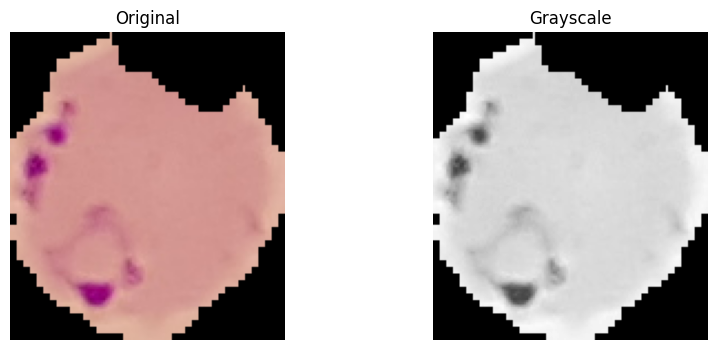

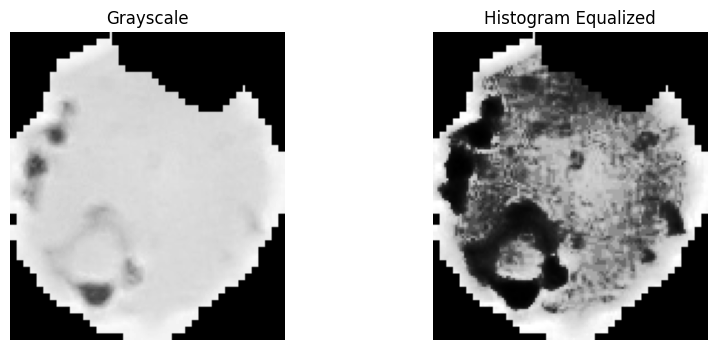

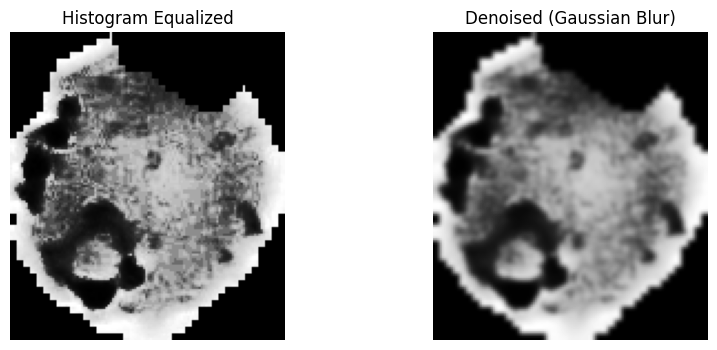

Processing Uninfected: 100%|██████████| 13780/13780 [01:51<00:00, 123.27it/s]


Train shape: (19290, 64, 64, 1)
Validation shape: (4134, 64, 64, 1)
Test shape: (4134, 64, 64, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748467506.555939      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748467506.556911      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,624,705 (6.20 MB)

 Trainable params: 1,624,705 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1748467511.040140     113 service.cc:148] XLA service 0x7b640c029e20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748467511.040846     113 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748467511.040867     113 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748467511.377611     113 cuda_dnn.cc:529] Loaded cuDNN version 90300


 33/603 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5283 - loss: 0.7081

I0000 00:00:1748467514.125168     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6930 - loss: 0.5676 - val_accuracy: 0.8609 - val_loss: 0.3138
Epoch 2/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8761 - loss: 0.2988 - val_accuracy: 0.8931 - val_loss: 0.2570
Epoch 3/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9089 - loss: 0.2341 - val_accuracy: 0.9107 - val_loss: 0.2233
Epoch 4/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9257 - loss: 0.2065 - val_accuracy: 0.9156 - val_loss: 0.2115
Epoch 5/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9330 - loss: 0.1847 - val_accuracy: 0.9202 - val_loss: 0.2062
Epoch 6/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9397 - loss: 0.1604 - val_accuracy: 0.9095 - val_loss: 0.2313
Epoch 7/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9447 - loss: 0.1488 - val_accuracy: 0.9207 - val_loss: 0.2070
Epoch 8/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9490 - loss: 0.1435 - val_accuracy: 0.9231 - val

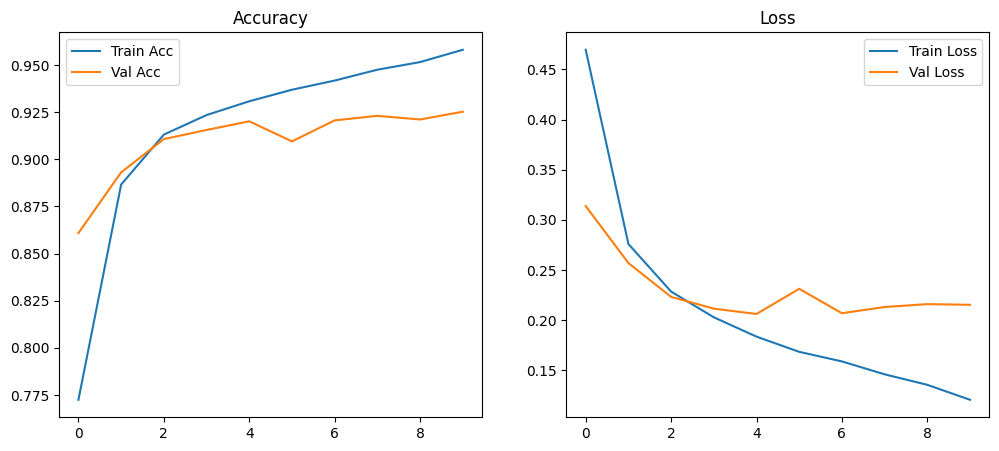

130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


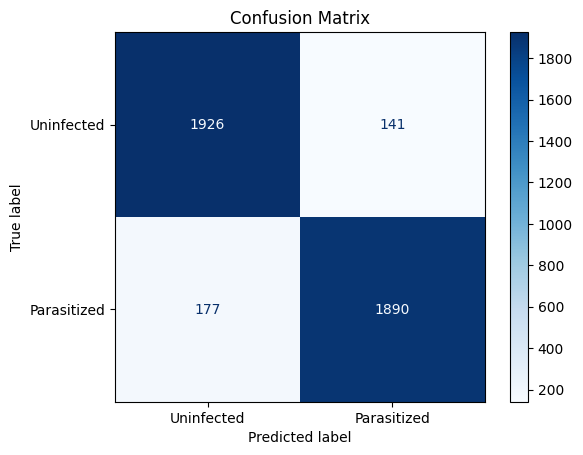

              precision    recall  f1-score   support

  Uninfected       0.92      0.93      0.92      2067
 Parasitized       0.93      0.91      0.92      2067

    accuracy                           0.92      4134
   macro avg       0.92      0.92      0.92      4134
weighted avg       0.92      0.92      0.92      4134



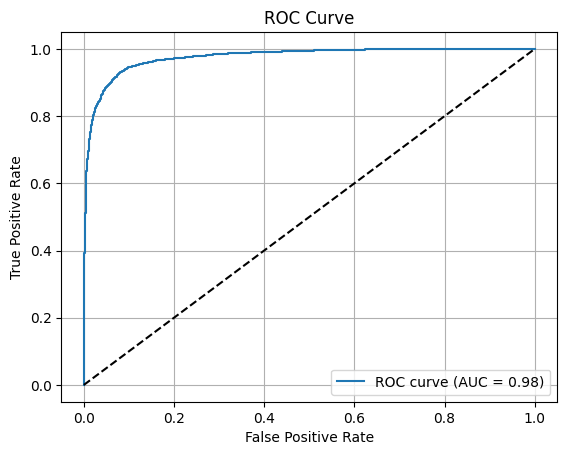

In [ ]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ============================
# Dataset Paths
# ============================
base_dir = "/kaggle/input/cell-images-for-detecting-malaria/cell_images"
infected_dir = os.path.join(base_dir, "Parasitized")
uninfected_dir = os.path.join(base_dir, "Uninfected")

print("Number of Parasitized images:", len(os.listdir(infected_dir)))
print("Number of Uninfected images:", len(os.listdir(uninfected_dir)))

# ============================
# Show Random Images
# ============================
def show_random_images(folder, title, n=5):
    files = os.listdir(folder)
    samples = random.sample(files, n)
    plt.figure(figsize=(15, 3))
    for i, file in enumerate(samples):
        img = cv2.imread(os.path.join(folder, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)
    plt.tight_layout()
    plt.show()

show_random_images(infected_dir, "Parasitized")
show_random_images(uninfected_dir, "Uninfected")

# ============================
# Class Distribution
# ============================
infected_count = len(os.listdir(infected_dir))
uninfected_count = len(os.listdir(uninfected_dir))
plt.bar(["Parasitized", "Uninfected"], [infected_count, uninfected_count], color=["red", "green"])
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()

# ============================
# Example Image Processing
# ============================
sample_path = os.path.join(infected_dir, random.choice(os.listdir(infected_dir)))
img = cv2.imread(sample_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.show()

equalized = cv2.equalizeHist(gray)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized")
plt.axis('off')
plt.show()

denoised = cv2.GaussianBlur(equalized, (5, 5), 0)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised (Gaussian Blur)")
plt.axis('off')
plt.show()

# ============================
# Preprocessing Function
# ============================
def preprocess_image(image_path, target_size=(64, 64)):
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.resize(img, target_size)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(gray)
    denoised = cv2.GaussianBlur(equalized, (5, 5), 0)
    return denoised

# ============================
# Load and Process Dataset
# ============================
data = []
labels = []
for img_file in tqdm(os.listdir(infected_dir), desc="Processing Parasitized"):
    img_path = os.path.join(infected_dir, img_file)
    processed_img = preprocess_image(img_path)
    if processed_img is not None:
        data.append(processed_img)
        labels.append(1)

for img_file in tqdm(os.listdir(uninfected_dir), desc="Processing Uninfected"):
    img_path = os.path.join(uninfected_dir, img_file)
    processed_img = preprocess_image(img_path)
    if processed_img is not None:
        data.append(processed_img)
        labels.append(0)

data = np.array(data)
labels = np.array(labels)
data = np.expand_dims(data, axis=-1)
data = data / 255.0

# ============================
# Train/Val/Test Split
# ============================
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.30, stratify=labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

# ============================
# CNN Model
# ============================
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# ============================
# Training
# ============================
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

# ============================
# Evaluation
# ============================
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Uninfected", "Parasitized"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=["Uninfected", "Parasitized"]))
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()
